In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = keras.datasets.mnist

In [3]:
(train_images, train_labels),(test_images,test_labels) = data.load_data()

In [4]:
test_labels.shape

(10000,)

In [5]:
train_images.shape
# shows that the image have 60,000 images at 28 by 28 pixel

(60000, 28, 28)

number is: 5


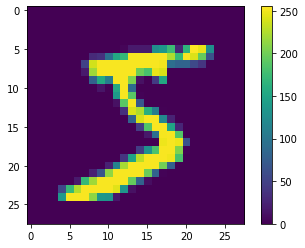

In [6]:
i = 500 # number from 0 to 59,999

plt.imshow(train_images[0])
plt.colorbar()
plt.show
print(f"number is: {train_labels[0]}")

In [7]:
# normalising the data
train_images = train_images/255
test_images = test_images/255

In [8]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<function matplotlib.pyplot.show(close=None, block=None)>

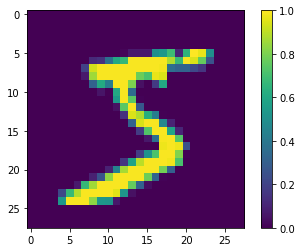

In [9]:
plt.imshow(train_images[0])
plt.colorbar()
plt.show

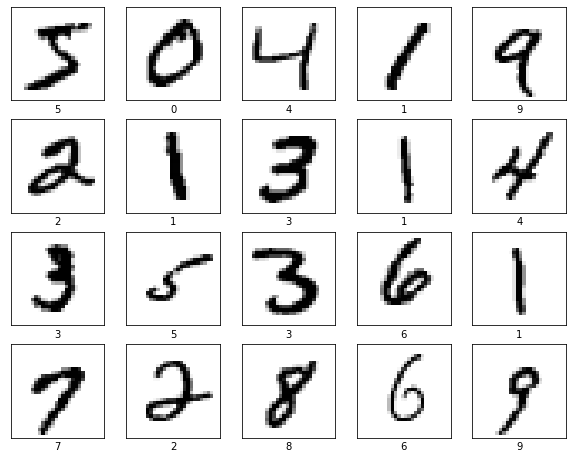

In [10]:
# view and verify first 20 data

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap = plt.cm.binary) #cmap binary makes it black or white
    plt.xlabel(train_labels[i])
plt.show()

In [11]:
# model building

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), # input shape is required (basically the size of the image)
    keras.layers.Dense(128, activation = 'relu'), # returns an output shape of 128
    keras.layers.Dense(10) # is the amount of output since 0 - 9 is 10 different possible outcome
])

In [12]:
'''
From: https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough
Define the loss and gradients function
Both training and evaluation stages need to calculate the model's loss.
This measures how off a model's predictions are from the desired label, in other words, how bad the model is performing.
You want to minimize, or optimize, this value.

Your model will calculate its loss using the tf.keras.losses.SparseCategoricalCrossentropy function 
which takes the model's class probability predictions and the desired label, and returns the average loss across the examples
'''
"""
Create an optimizer
An optimizer applies the computed gradients to the model's parameters to minimize the loss function. 
You can think of the loss function as a curved surface (refer to Figure 3) and you want to find its lowest point by walking around. 
The gradients point in the direction of steepest ascent—so you'll travel the opposite way and move down the hill.
By iteratively calculating the loss and gradient for each batch, you'll adjust the model during training. 
Gradually, the model will find the best combination of weights and bias to minimize the loss.
And the lower the loss, the better the model's predictions.
"""


model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 3)         0         
                                                                 
 dense (Dense)               (None, 28, 28, 128)       512       
                                                                 
 dense_1 (Dense)             (None, 28, 28, 10)        1290      
                                                                 
Total params: 1,802
Trainable params: 1,802
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(train_images, train_labels, epochs = 10) # epoch is like iterations like k-means

Epoch 1/10


ValueError: in user code:

    File "C:\Users\Xavier\Desktop\Projects\image_test\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Xavier\Desktop\Projects\image_test\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Xavier\Desktop\Projects\image_test\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Xavier\Desktop\Projects\image_test\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Xavier\Desktop\Projects\image_test\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Xavier\Desktop\Projects\image_test\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (32, 28, 28)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(32, 28, 28), dtype=float32)
      • training=True
      • mask=None


In [15]:
predictions = model(train_images)
predictions[:5]

In [16]:
tf.nn.softmax(predictions[:5])

In [17]:



test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)

In [18]:
prob_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
prob_model

In [19]:
pred = prob_model.predict(test_images)

In [20]:
pred[1]

In [21]:
i = 1
print("model test answer")
print(np.argmax(pred[i]))
print("correct label of test")
print(test_labels[i])

In [22]:
import cv2

In [51]:
img_arr=cv2.imread("number7.png")

img_arr=cv2.resize(img_arr,(28,28))

In [55]:
arr_img=np.array(img_arr)
arr_img=arr_img/255.0

In [58]:
img_height = 28
img_width = 28

In [59]:
number7 = "number7.png"
number_path = tf.keras.utils.get_file('number7', origin=number7)

img = tf.keras.utils.load_img(
    number_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [60]:

img = tf.keras.utils.load_img(
    "number7.png", target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [57]:
predictions = model.predict(arr_img)